This Jupyter notebook is one of many that fully document the data analysis completed for the publication "DNA Barcoding, Collection Management, and the Bird Collection in the Smithsonian’s National Museum of Natural History" by Schindel et al.

You can view all analysis notebooks, data, and figures in the GitHub repository here: https://github.com/MikeTrizna/USNMBirdDNABarcoding2017

# Creating Figure 1 -- Geographic distribution map of sequence records

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols_to_keep = ['accession','country','scientific_name','lat_lon']
specimen_data = pd.read_csv('data/original/schindel2017.tsv', sep='\t', usecols=cols_to_keep)
print(specimen_data.head())
print(len(specimen_data))

  accession                     country lat_lon          scientific_name
0  JQ176654                      Guyana     NaN  Xiphorhynchus obsoletus
1  JQ176549  Guyana: Northwest District     NaN         Trogon violaceus
2  JQ176510                      Guyana     NaN    Todirostrum maculatum
3  JQ176359  Guyana: Northwest District     NaN    Tachyphonus luctuosus
4  JQ176343                      Guyana     NaN       Tachornis squamata
2980


In [3]:
specimen_data = specimen_data[pd.notnull(specimen_data['lat_lon'])]
print(len(specimen_data))

1859


In [4]:
def split_gb_lat_lon(row):
    lat_lon_split = row['lat_lon'].split(' ')
    row['lat'] = float(lat_lon_split[0])
    if lat_lon_split[1] == 'S':
        row['lat'] = row['lat'] * -1
    row['lon'] = float(lat_lon_split[2])
    if lat_lon_split[3] == 'W':
        row['lon'] = row['lon'] * -1
    return row

In [5]:
specimen_data = specimen_data.apply(split_gb_lat_lon, axis=1)
print(specimen_data.head())

    accession            country            lat_lon         scientific_name  \
107  JQ176320     Greece: Lesvos  39.129 N 26.219 E        Sylvia hortensis   
108  JQ176318     Greece: Lesvos  39.129 N 26.219 E       Sylvia cantillans   
117  JQ176232     Greece: Lesvos  39.222 N 25.942 E          Sitta neumayer   
134  JQ176120  Greece: Macedonia  41.481 N 24.325 E     Regulus ignicapilla   
144  JQ176047  Greece: Macedonia  41.481 N 24.325 E  Ptyonoprogne rupestris   

        lat     lon  
107  39.129  26.219  
108  39.129  26.219  
117  39.222  25.942  
134  41.481  24.325  
144  41.481  24.325  


## Basemap static distribution map for publication

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [7]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

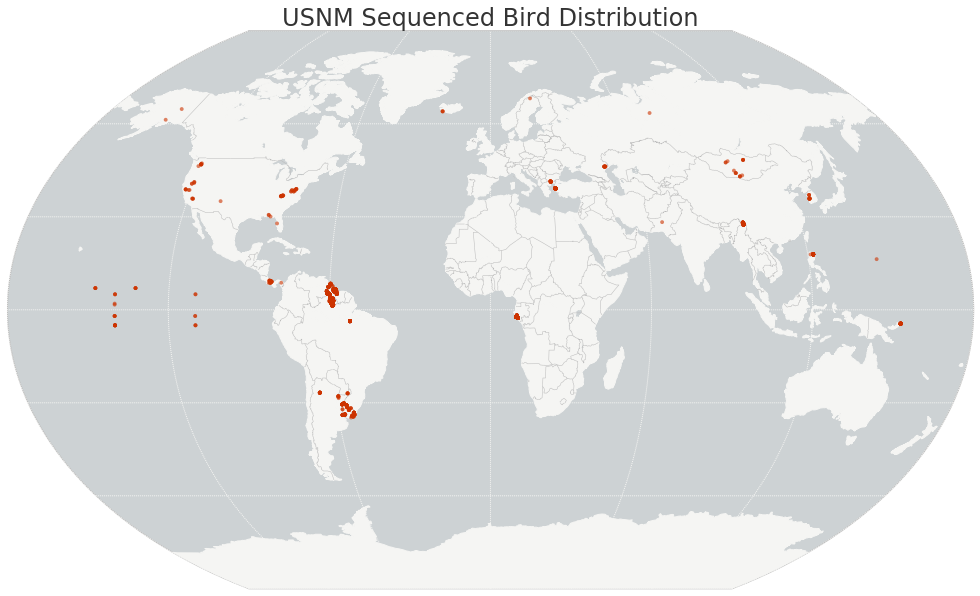

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, axisbg='#ffffff', frame_on=False)
ax.set_title('USNM Sequenced Bird Distribution', fontsize=24, color='#333333')

m = Basemap(projection='kav7', lon_0=0, resolution='l', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

x, y = m(specimen_data['lon'].tolist(), specimen_data['lat'].tolist())
m.scatter(x, y, s=15, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

plt.show()

In [9]:
fig.savefig('figures/geographic_distribution.png', bbox_inches='tight')

## Folium interactive cluster map

In [10]:
from folium import Map
from folium.plugins import MarkerCluster

In [11]:
lat_lons = specimen_data[['lat','lon']].to_records(index=False).tolist()

In [12]:
map = Map(location=[specimen_data['lat'].mean(), specimen_data['lon'].mean()],
                    tiles='Mapbox Bright', zoom_start=2)

In [13]:
map.add_child(MarkerCluster(locations=lat_lons))